<a href="https://colab.research.google.com/github/Bhaswati974/GRIPinternship/blob/GRIPinternship/GRIP_TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem :  Predict the percentage of the students based on the number of 
hours they studies using simple regression model which involves two variables, i.e., the scores of students and their study hours.**

> **Importing the libraries-**




In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
%matplotlib inline

**Loading and reading of Iris dataset**

In [5]:
df="http://bit.ly/w-data"
data=pd.read_csv(df)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.shape

(25, 2)

In [7]:
data.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Evaluating for missing data**

In [9]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


**Getting the types of the variables under consideration**

In [10]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

**VISUALIZATION**

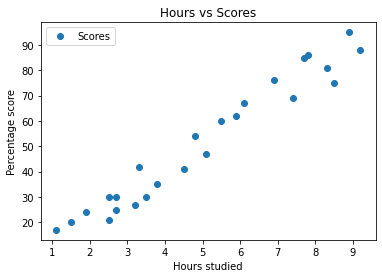

In [11]:
#plotting the distribution of scores to understand the pattern of relationship of the two variables
data.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")
plt.show()

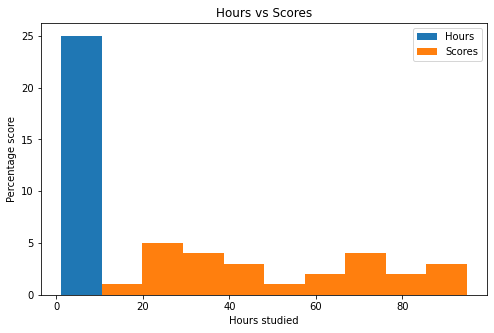

In [12]:
data.plot(kind='hist',figsize=(8,5))
plt.title("Hours vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")
plt.show()

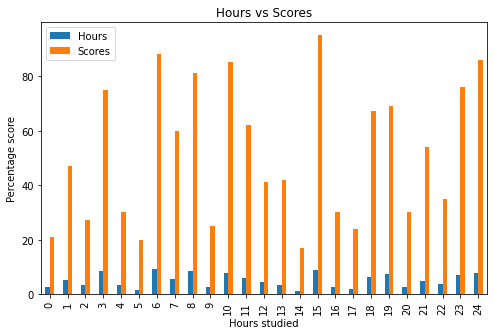

In [13]:
data.plot(kind='bar',figsize=(8,5))
plt.title("Hours vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")
plt.show()

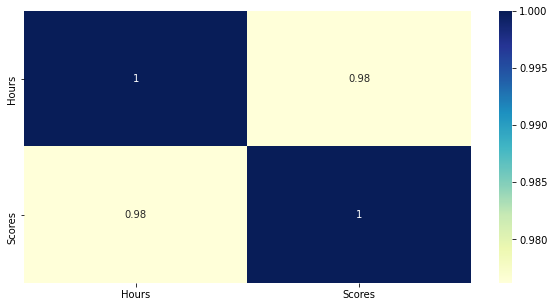

In [14]:
# Checking the correlations
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu",annot_kws={'fontsize':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Preparing Data for Modelling**

In [15]:
x=data.iloc[:, :-1].values
y=data.iloc[:, 1].values

In [16]:
# Splitting the data into test and train
X_train,X_test, y_train,y_test=train_test_split(x, y,test_size=0.25,random_state=0)

In [17]:
#Building the linear model and train it
lr=LinearRegression()
lr.fit(X_train,y_train)
print("Training is complete.")

Training is complete.


In [18]:
print("The coefficient is: ")
lr.coef_

The coefficient is: 


array([9.94167834])

In [19]:
line=lr.intercept_+lr.coef_*x

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


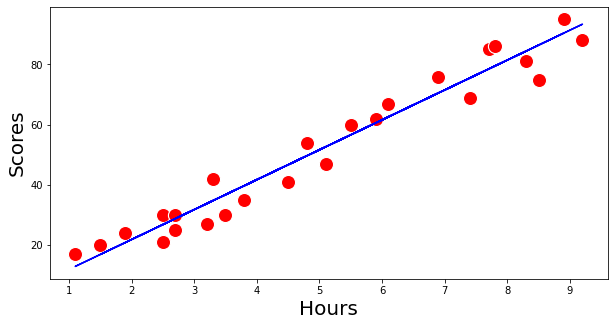

In [20]:
# Getting the best fitted line on the graph
plt.figure(figsize=(10,5))
sns.scatterplot(data['Hours'],data['Scores'],s=200,color='r')
plt.plot(data['Hours'],line,'b')
plt.xlabel(xlabel='Hours',fontsize=20)
plt.ylabel(ylabel='Scores',fontsize=20)
plt.show()

**Making Prediction**

In [21]:
print(X_test)
y_pred=lr.predict(X_test) #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [22]:
# Comparing Actual vs Predicted values
datafr=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
datafr

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [23]:
# Testing the model to redict the percentage of student if he studies for 9.25 hours
hours=9.25
pred=lr.predict(np.array(hours).reshape(-1,1))
print("No of hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of hours = 9.25
Predicted Score = 93.89272889341652


**Evaluating the performance of the model**

In [25]:
# The final step is to evaluate the performance of the algorithm.
# This step is particularly important to compare how well different algorithms perform on a particular dataset.
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error:  4.130879918502482
Mean Squared Error:  20.33292367497996
Root Mean Squared Error:  2.0324566215549305


**Conclusion: we can see that the value of root mean squared error is 2.032 and the mean value of the percentages of all the students is 51.48 (from the Statistical details obtained in cell no. 5). Here root mean squared error is less than 10% of the mean value of the percentages of all the student scores. Hence, it is safe to conclude that the model did a decent job to predict the student score as 93.89%  when student studies for 9.25.** 